In [ ]:
"""

This notebook is created to generate masks usinh HSV.
After few trails its decided to generate segmentation masks using pre-trained "deepLabV3"
So, this notebook is not in use, did few trails and learnt few points.

"""

In [2]:

# Paths
dataset_path = "../data/selected_categories/EuroSAT"
test_data_path = "../data/test_data"
preprocessed_dir = "../data/preprocessed_data"
categories = ["Forest", "Residential", "Highway", "AnnualCrop", "HerbaceousVegetation", "Industrial"]
image_size = 128  # Resize to 128x128


## Test Masking Techniques

### Use a small subset of images to test greenery detection (e.g., HSV filtering):

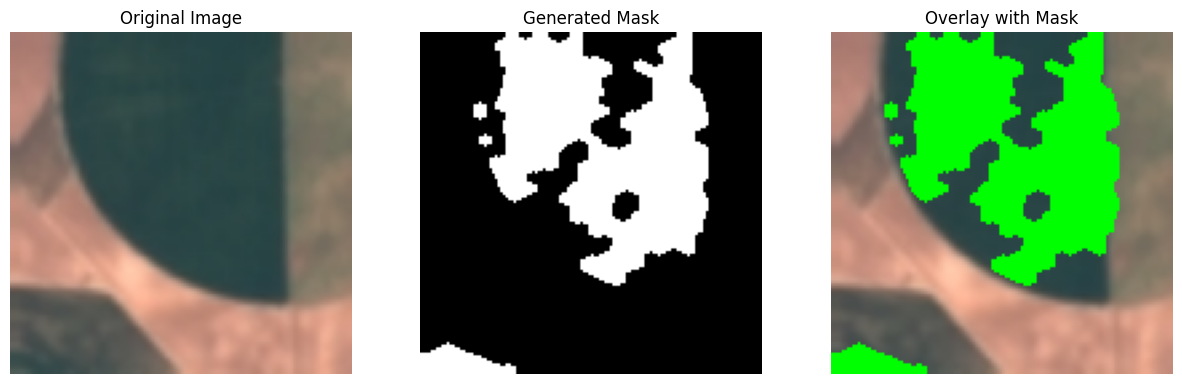

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([30, 30, 30])  # Adjusted thresholds
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fill small gaps
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
    
    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))  # Resize if needed

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Display original image, mask, and overlay
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()


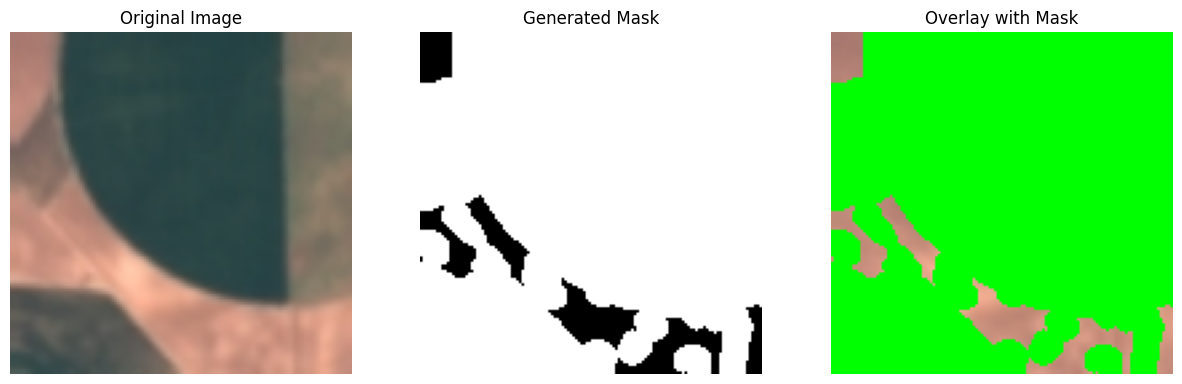

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV mask
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 20, 20])
    upper_green = np.array([95, 255, 255])
    hsv_mask = cv2.inRange(hsv, lower_green, upper_green)

    # LAB mask
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    _, a, _ = cv2.split(image_lab)
    lab_mask = cv2.inRange(a, 100, 140)

    # Combine HSV and LAB masks
    combined_mask = cv2.bitwise_or(hsv_mask, lab_mask)
    
    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
    combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_DILATE, kernel)
    
    return combined_mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))  # Resize if needed

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Display the original, mask, and overlay
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()


HSV at (64, 64): [88 90 79]


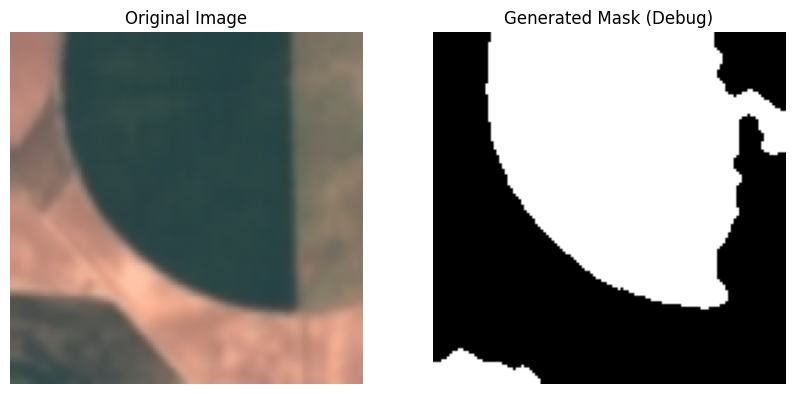

Greenery coverage in the mask: 48.47%


In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: Comment this out to debug CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 20, 20])  # Loosened thresholds
    upper_green = np.array([95, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Debug: Print HSV values at a few pixels
    print("HSV at (64, 64):", hsv[64, 64])

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Debugging: Visualize the mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask (Debug)")
plt.axis("off")
plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


HSV at (64, 64): [88 90 79]


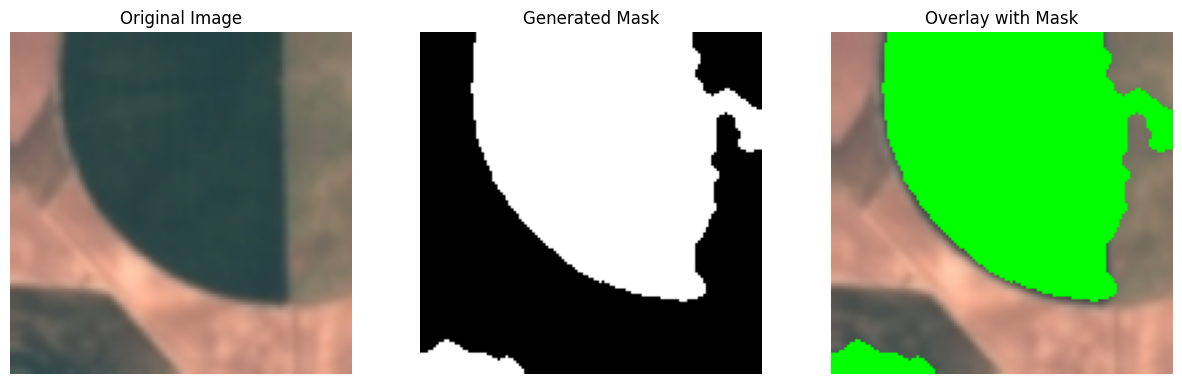

Greenery coverage in the mask: 48.47%


In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: Comment this out to debug CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 20, 20])  # Loosened thresholds
    upper_green = np.array([95, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Debug: Print HSV values at a few pixels
    print("HSV at (64, 64):", hsv[64, 64])

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


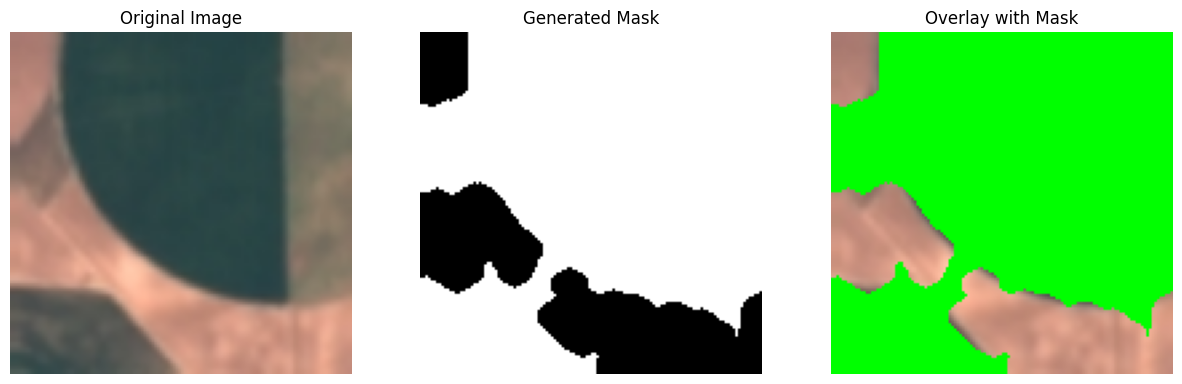

Greenery coverage in the mask: 75.70%


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: Comment this out to debug CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 50, 50])  # Adjusted thresholds
    upper_green = np.array([95, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # LAB Masking
    _, a, _ = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    mask_lab = cv2.inRange(a, 100, 140)

    # Combine HSV and LAB masks
    mask = cv2.bitwise_or(mask_hsv, mask_lab)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.erode(mask, kernel, iterations=1)  # Shrink detected regions slightly

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


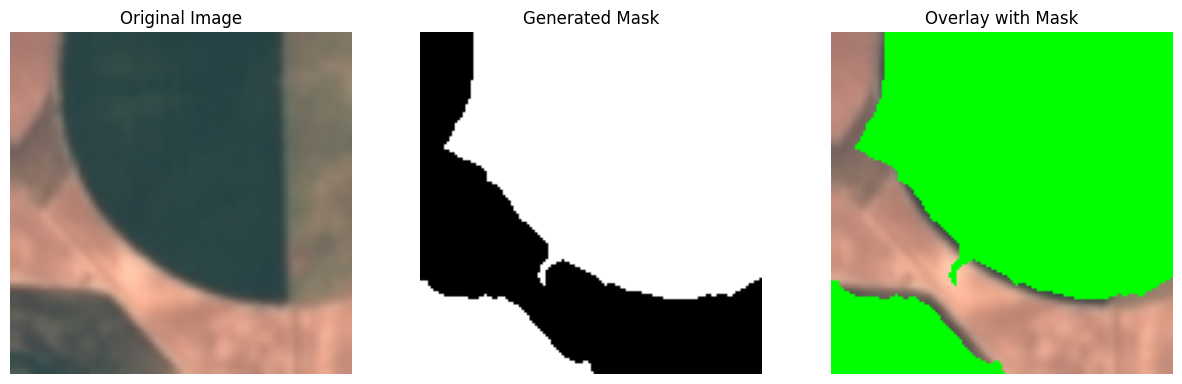

Greenery coverage in the mask: 67.11%


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 70, 70])  # Increased S and V thresholds
    upper_green = np.array([95, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # LAB Masking
    _, a, _ = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    mask_lab = cv2.inRange(a, 105, 135)  # Narrower range for LAB

    # Combine HSV and LAB masks
    mask = cv2.bitwise_or(mask_hsv, mask_lab)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.erode(mask, kernel, iterations=1)  # Shrink detected regions slightly

    # Remove small regions
    contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) < 50:  # Remove regions smaller than 50 pixels
            cv2.drawContours(mask, [contour], -1, (0, 0, 0), -1)

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


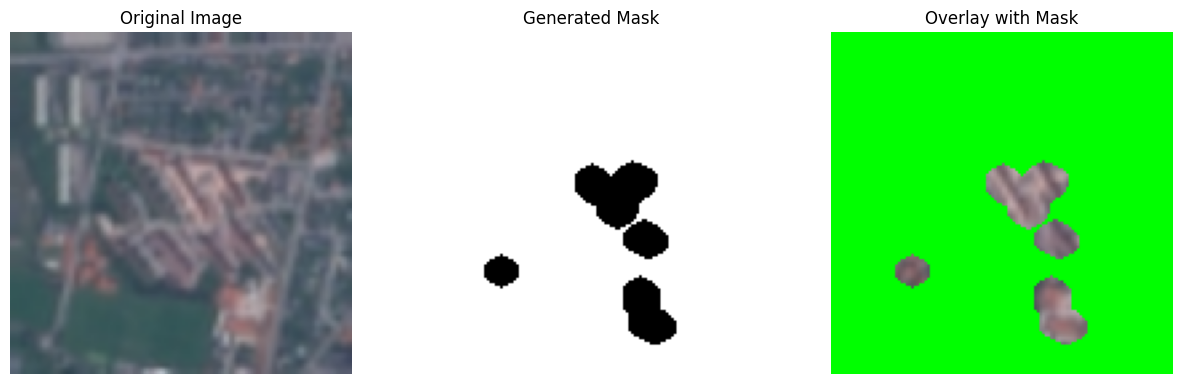

Greenery coverage in the mask: 93.01%


In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 70, 70])  # Increased S and V thresholds
    upper_green = np.array([95, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # LAB Masking
    _, a, _ = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    mask_lab = cv2.inRange(a, 105, 135)  # Narrower range for LAB

    # Combine HSV and LAB masks
    mask = cv2.bitwise_or(mask_hsv, mask_lab)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.erode(mask, kernel, iterations=1)  # Shrink detected regions slightly

    # Remove small regions
    contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) < 50:  # Remove regions smaller than 50 pixels
            cv2.drawContours(mask, [contour], -1, (0, 0, 0), -1)

    return mask / 255.0  # Normalize

# Load a sample image
# image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_136.jpg"
image_path = f"{dataset_path}/Residential/Residential_22.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


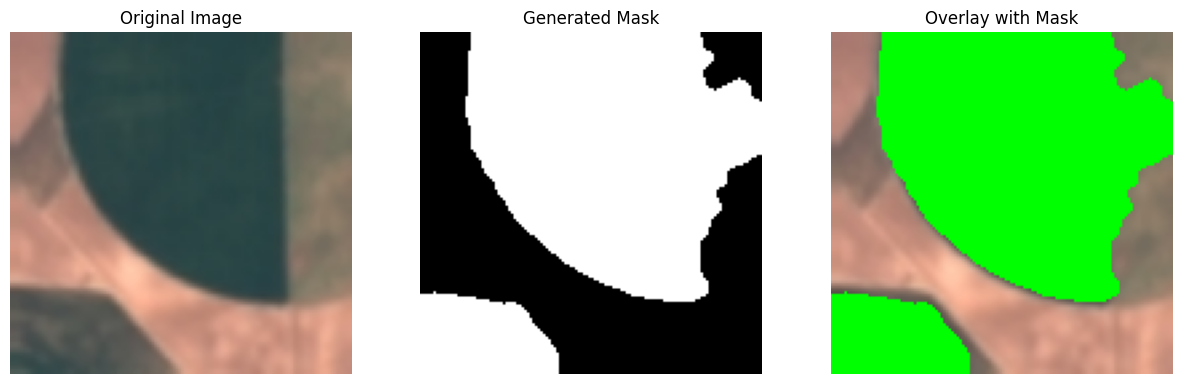

Greenery coverage in the mask: 58.47%


In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Greenery detection
    lower_green = np.array([35, 80, 80])  # Increased S and V for greens
    upper_green = np.array([95, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # Brown exclusion
    brown_lower = np.array([10, 30, 30])  # Typical brown hues
    brown_upper = np.array([20, 255, 255])
    mask_brown = cv2.inRange(hsv, brown_lower, brown_upper)

    # LAB Masking
    _, a, _ = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    mask_lab = cv2.inRange(a, 110, 130)  # Narrow LAB range

    # Combine HSV and LAB masks, exclude brown
    mask = cv2.bitwise_or(mask_hsv, mask_lab)
    mask = cv2.bitwise_and(mask, cv2.bitwise_not(mask_brown))  # Exclude browns

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


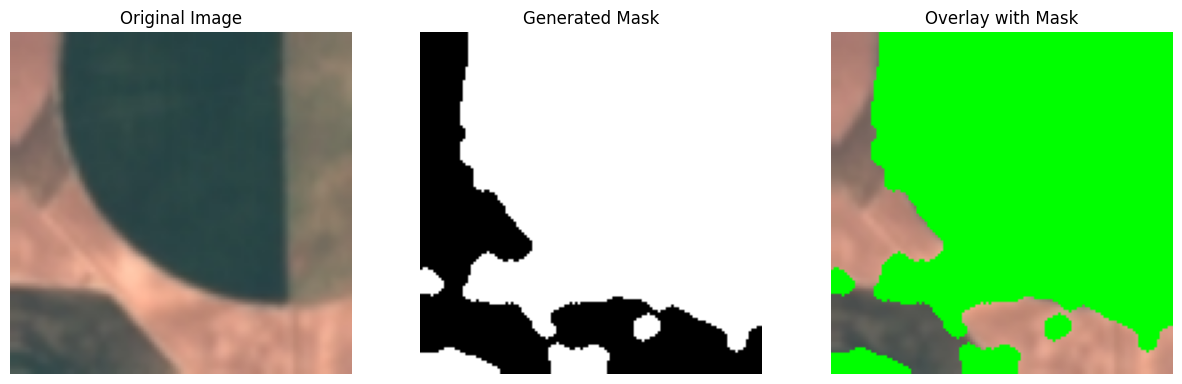

Combined greenery + brown coverage in the mask: 71.91%


In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Greenery detection
    lower_green = np.array([25, 30, 30])  # Loosened thresholds for brownish greens
    upper_green = np.array([95, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # Brown detection
    brown_lower = np.array([10, 20, 20])  # Specific thresholds for brown tones
    brown_upper = np.array([25, 255, 255])
    mask_brown = cv2.inRange(hsv, brown_lower, brown_upper)

    # Combine greenery and brown masks
    mask = cv2.bitwise_or(mask_hsv, mask_brown)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight detected areas in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Combined greenery + brown coverage in the mask: {coverage:.2f}%")


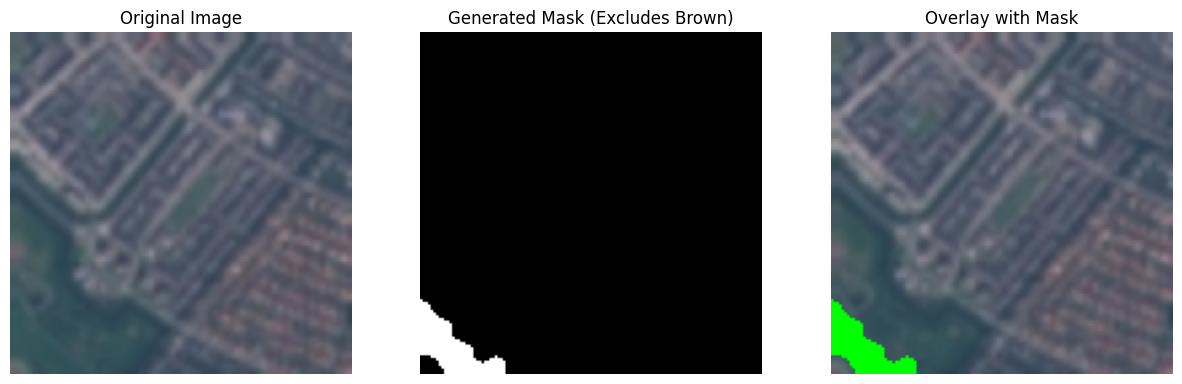

Greenery coverage in the mask (excluding brown): 2.38%


In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Greenery detection
    lower_green = np.array([35, 70, 70])  # Focus on vibrant greens
    upper_green = np.array([95, 255, 255])
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Brown detection
    brown_lower = np.array([10, 20, 20])  # Typical brown hues
    brown_upper = np.array([25, 200, 200])
    mask_brown = cv2.inRange(hsv, brown_lower, brown_upper)

    # Exclude brown from green mask
    mask_green = cv2.bitwise_and(mask_green, cv2.bitwise_not(mask_brown))

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

    return mask_green / 255.0  # Normalize

# Load a sample image
#image_path = f"{dataset_path}/AnnualCrop/AnnualCrop_70.jpg"
image_path = f"{dataset_path}/Residential/Residential_1.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask (Excludes Brown)")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask (excluding brown): {coverage:.2f}%")


finalizedd

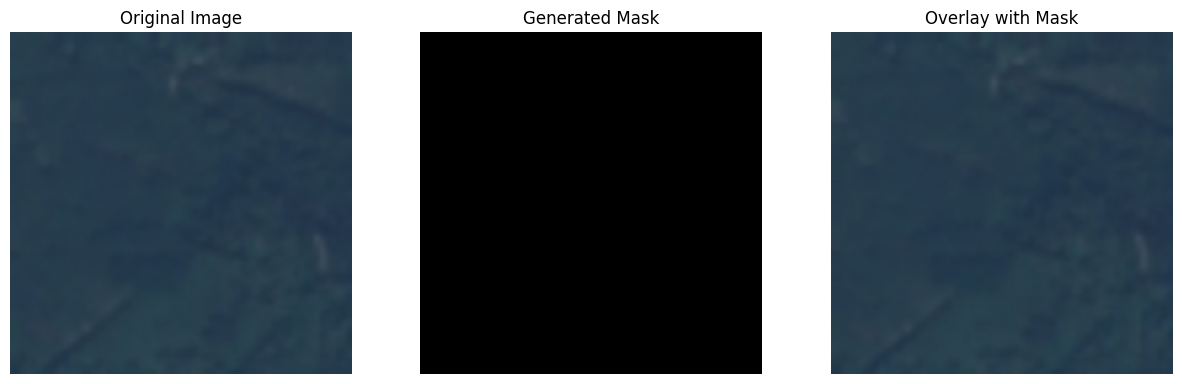

Greenery coverage in the mask: 0.00%


In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Adjust thresholds based on brightness
    brightness = np.mean(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    if brightness < 100:  # Darker images
        lower_green = np.array([35, 30, 30])
    else:  # Brighter images
        lower_green = np.array([35, 40, 40])
    upper_green = np.array([95, 255, 255])

    # Greenery detection
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Brown detection
    brown_lower = np.array([10, 20, 20])  # Typical brown hues
    brown_upper = np.array([25, 200, 200])
    mask_brown = cv2.inRange(hsv, brown_lower, brown_upper)

    # Exclude brown from green mask
    mask_green = cv2.bitwise_and(mask_green, cv2.bitwise_not(mask_brown))

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
    mask_green = cv2.dilate(mask_green, kernel, iterations=1)  # Expand detected regions

    return mask_green / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/Forest/Forest_1.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


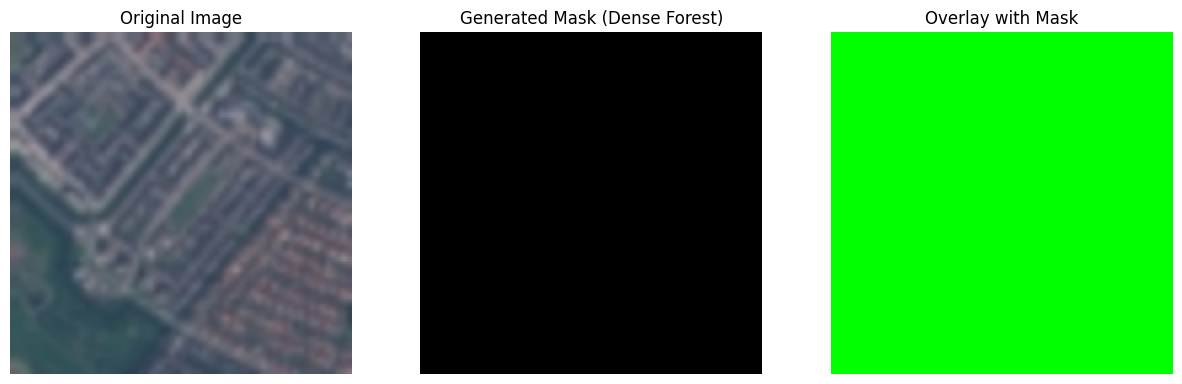

Greenery coverage in the mask: 100.00%


In [49]:
####working great for forest, shud test for otehrs

import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Greenery detection in HSV
    lower_green = np.array([35, 40, 10])  # Adjusted for darker greens
    upper_green = np.array([95, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # Greenery detection in LAB
    _, a, _ = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    mask_lab = cv2.inRange(a, 100, 140)  # Adjusted LAB A-channel range

    # Combine HSV and LAB masks
    mask_combined = cv2.bitwise_or(mask_hsv, mask_lab)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask_combined = cv2.morphologyEx(mask_combined, cv2.MORPH_CLOSE, kernel)
    mask_combined = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel)

    return mask_combined / 255.0  # Normalize

# Load a sample image
#image_path = f"{dataset_path}/Forest/Forest_150.jpg"
image_path = f"{dataset_path}/Residential/Residential_1.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Debugging: Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask (Dense Forest)")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


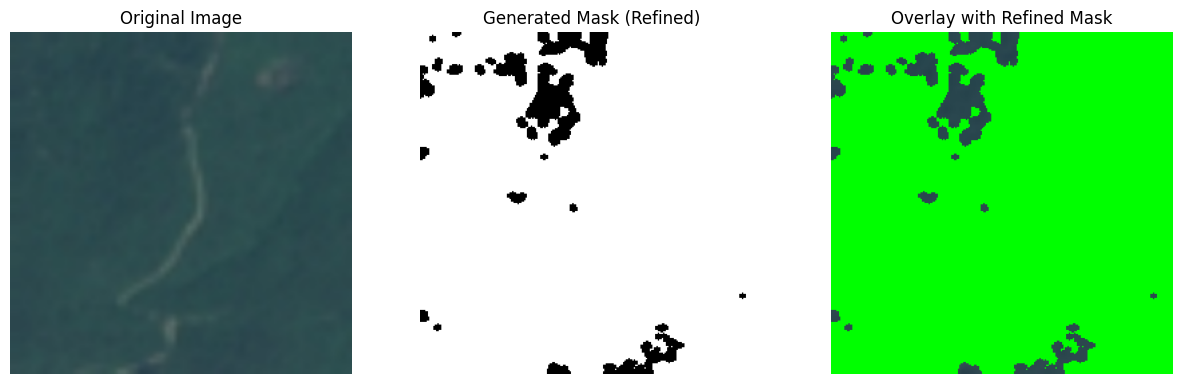

Coverage in the mask: 74.77%


In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask_with_refinements(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Greenery detection in HSV
    lower_green = np.array([35, 40, 10])  # Loosened for dark greens
    upper_green = np.array([95, 255, 255])
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Non-green detection for brownish tones
    lower_non_green = np.array([10, 30, 30])  # Focused on narrow brown ranges
    upper_non_green = np.array([25, 200, 200])
    mask_non_green = cv2.inRange(hsv, lower_non_green, upper_non_green)

    # Edge detection for pathways
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    # Combine edges with non-green mask
    edges_combined = cv2.bitwise_and(edges, cv2.bitwise_not(mask_green))

    # Final mask: Combine greenery and pathways
    combined_mask = cv2.addWeighted(mask_green, 0.8, edges_combined, 0.2, 0)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)

    return combined_mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/Forest/Forest_150.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (256, 256))  # Higher resolution for better detail

# Generate mask with refinements
mask = generate_mask_with_refinements(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight detected areas in green

# Visualize
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask (Refined)")
plt.axis("off")

# Overlay
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Refined Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Coverage in the mask: {coverage:.2f}%")


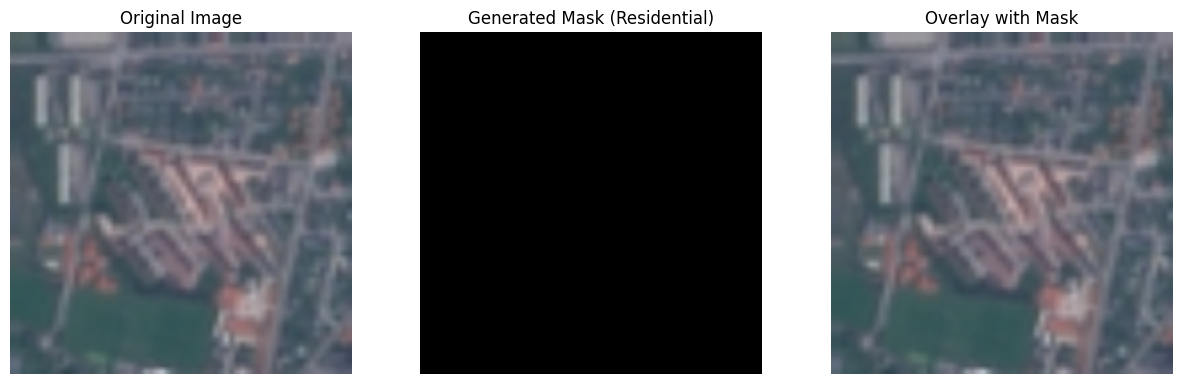

Greenery coverage in the mask: 0.00%


In [55]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_residential_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Greenery detection in HSV
    lower_green = np.array([35, 60, 50])  # Stricter thresholds for residential areas
    upper_green = np.array([85, 255, 255])
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Edge detection for buildings and roads
    edges = cv2.Canny(image, threshold1=100, threshold2=200)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    mask_edges = cv2.dilate(edges, kernel, iterations=1)  # Expand edges to cover structures

    # Subtract edges from greenery mask
    mask_green = cv2.bitwise_and(mask_green, cv2.bitwise_not(mask_edges))

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

    return mask_green / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/Residential/Residential_22.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (256, 256))  # Higher resolution for better detail

# Generate mask for residential areas
mask = generate_residential_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight detected areas in green

# Visualize
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask (Residential)")
plt.axis("off")

# Overlay
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


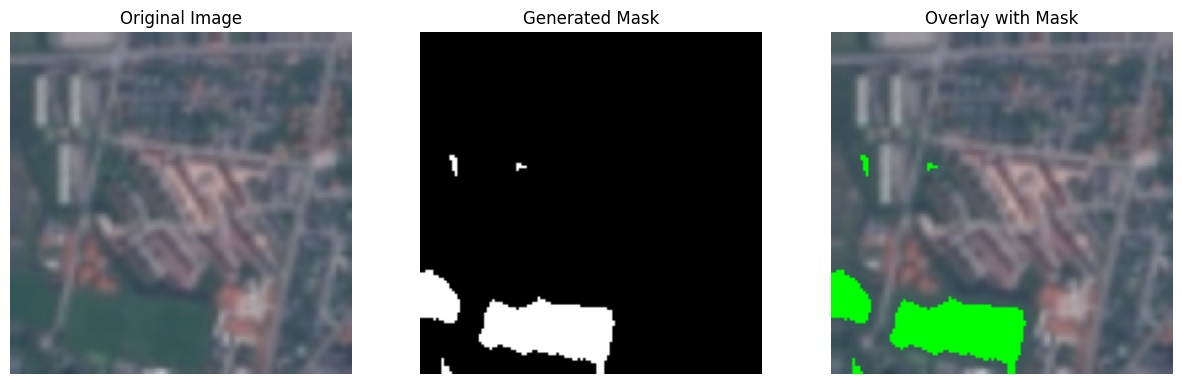

Greenery coverage in the mask: 7.10%


In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 60, 40])  # Adjusted thresholds for greenery
    upper_green = np.array([95, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Morphological operations (simplified)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fill small gaps
    mask = cv2.erode(mask, kernel, iterations=1)  # Remove small noise

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/Residential/Residential_22.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


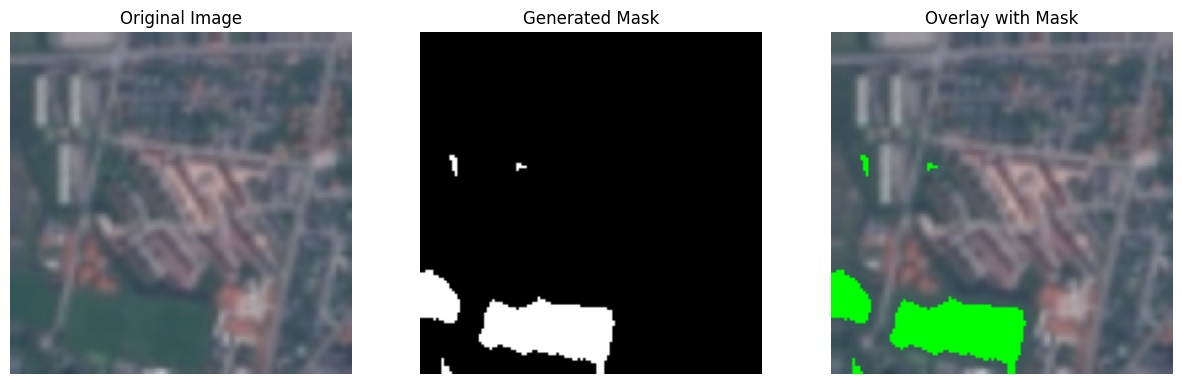

Greenery coverage in the mask: 7.10%


In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 60, 40])  # Adjusted thresholds for greenery
    upper_green = np.array([95, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Morphological operations (simplified)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fill small gaps
    mask = cv2.erode(mask, kernel, iterations=1)  # Remove small noise

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/Residential/Residential_22.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")


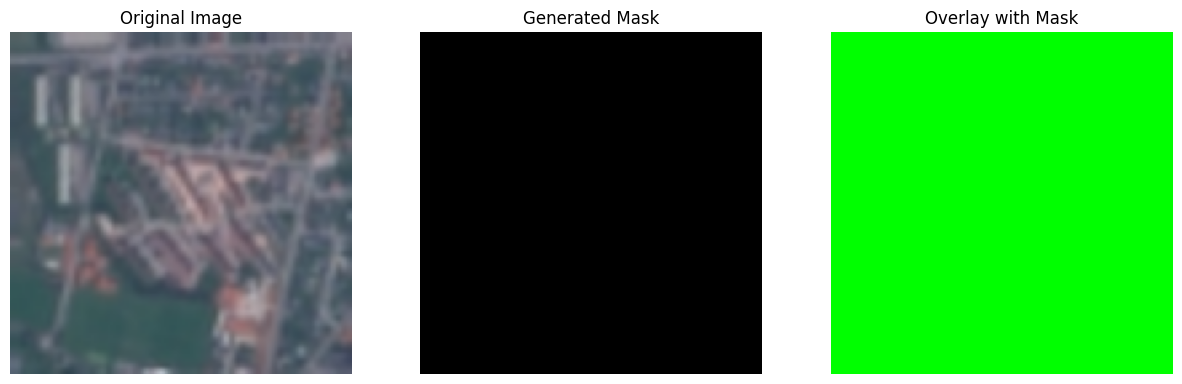

Greenery coverage in the mask: 100.00%


In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def generate_mask(image):
    # Preprocess image (Optional: CLAHE)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    image_eq = cv2.merge((l_eq, a, b))
    image = cv2.cvtColor(image_eq, cv2.COLOR_LAB2BGR)

    # HSV Masking
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([30, 50, 20])  # Loosened thresholds
    upper_green = np.array([100, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

    # LAB Masking
    _, a, _ = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    mask_lab = cv2.inRange(a, 105, 140)  # Refined LAB range

    # Combine HSV and LAB masks
    mask = cv2.bitwise_or(mask_hsv, mask_lab)

    # Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))  # Larger kernel for closing
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fill gaps
    mask = cv2.dilate(mask, kernel, iterations=1)  # Expand regions slightly

    return mask / 255.0  # Normalize

# Load a sample image
image_path = f"{dataset_path}/Residential/Residential_22.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

# Generate mask
mask = generate_mask(image)

# Create overlay
overlay = image.copy()
overlay[mask > 0.5] = [0, 255, 0]  # Highlight greenery in green

# Visualize the original, mask, and overlay
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")
plt.axis("off")

# Overlay with mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay with Mask")
plt.axis("off")

plt.show()

# Debugging: Check mask coverage
coverage = np.mean(mask) * 100
print(f"Greenery coverage in the mask: {coverage:.2f}%")
